In [ ]:
# Mount the Google drive with the notebook
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Download Dataset
dataset link: https://www.kaggle.com/datasets/andrewmvd/road-sign-detection

In [ ]:
# install kaggle
!pip install -q kaggle

In [ ]:
# create kaggle folder
!mkdir ~/.kaggle

# copy the kaggle.json to the folder created
!cp /content/drive/MyDrive/Colab_Notebooks/Kaggle_API_Token/kaggle.json ~/.kaggle/

# permission for the jason to act
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Loading the dataset using Kaggle API Command
!kaggle datasets download -d andrewmvd/road-sign-detection

 99% 217M/218M [00:06<00:00, 46.6MB/s]
100% 218M/218M [00:06<00:00, 33.1MB/s]


In [ ]:
# Unzipping the dataset
!unzip /content/road-sign-detection.zip

# Setup Necessary Paths

Tensorflow Model Zoo: https://github.com/tensorflow/models/blob/master/research/object_detection/g3doc/tf2_detection_zoo.md

In [ ]:
import os

In [ ]:
CUSTOM_MODEL_NAME = 'my_ssd_mobnet' 
PRETRAINED_MODEL_NAME = 'my_ssd_mobilenet_v2_fpnlite_320x320_epoch_20000'
PRETRAINED_MODEL_PATH = '/content/drive/MyDrive/Colab_Notebooks/Object_Detection/TFOD/TFOD_RoadSign/saved_models/my_ssd_mobilenet_v2_fpnlite_320x320_epoch_20000.tar.gz'
# TF_RECORD_SCRIPT_NAME = 'generate_tfrecord.py'
LABEL_MAP_NAME = 'label_map.pbtxt'

In [ ]:
paths = {
    'WORKSPACE_PATH': os.path.join('Tensorflow', 'workspace'),
    'SCRIPTS_PATH': os.path.join('Tensorflow','scripts'),
    'APIMODEL_PATH': os.path.join('Tensorflow','models'),
    'ANNOTATION_PATH': os.path.join('Tensorflow', 'workspace','annotations'),
    'IMAGE_PATH': os.path.join('Tensorflow', 'workspace','images'),
    'MODEL_PATH': os.path.join('Tensorflow', 'workspace','models'),
    'PRETRAINED_MODEL_PATH': os.path.join('Tensorflow', 'workspace','pre-trained-models'),
    'CHECKPOINT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME), 
    'OUTPUT_PATH': os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'export'), 
    'TFJS_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfjsexport'), 
    'TFLITE_PATH':os.path.join('Tensorflow', 'workspace','models',CUSTOM_MODEL_NAME, 'tfliteexport'), 
    'PROTOC_PATH':os.path.join('Tensorflow','protoc')
 }

In [ ]:
files = {
    'PIPELINE_CONFIG':os.path.join('Tensorflow', 'workspace','models', CUSTOM_MODEL_NAME, 'pipeline.config'),
    # 'TF_RECORD_SCRIPT': os.path.join(paths['SCRIPTS_PATH'], TF_RECORD_SCRIPT_NAME),
    'LABELMAP': os.path.join(paths['ANNOTATION_PATH'], LABEL_MAP_NAME)
}

In [ ]:
# create the directories
for path in paths.values():
    if not os.path.exists(path):
        if os.name == 'posix':
            !mkdir -p {path}
        if os.name == 'nt':
            !mkdir {path}

In [ ]:
# get the all the class names
!grep -ERoh '<name>(.*)</name>' {'/content/annotations'} | sort | uniq | sed 's/<name>//g' | sed 's/<\/name>//g' > ./labels.txt

# Download TF Models Pretrained Models from Tensorflow Model Zoo and Install TFOD

In [ ]:
# Download the tensorflow models git repo
if not os.path.exists(os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection')):
    !git clone https://github.com/tensorflow/models {paths['APIMODEL_PATH']}
    !cd {paths['APIMODEL_PATH']} && git checkout 0aadb8d3e24181845a678f9856eae7e8deecdb83 # Commit of May 31, 2022

Cloning into 'Tensorflow/models'...
remote: Enumerating objects: 74478, done.
remote: Counting objects: 100% (498/498), done.
remote: Compressing objects: 100% (265/265), done.
remote: Total 74478 (delta 265), reused 438 (delta 223), pack-reused 73980
Receiving objects: 100% (74478/74478), 580.38 MiB | 17.21 MiB/s, done.
Resolving deltas: 100% (52731/52731), done.
Note: checking out '0aadb8d3e24181845a678f9856eae7e8deecdb83'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by performing another checkout.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -b with the checkout command again. Example:

  git checkout -b <new-branch-name>

HEAD is now at 0aadb8d3e Add per-class precision and recall for image classification task.


In [ ]:
# We'll use our custom setup.py file for TFOD installation

import os
import shutil

os.remove('/content/Tensorflow/models/research/object_detection/packages/tf2/setup.py')
shutil.copyfile(src = '/content/drive/MyDrive/Colab_Notebooks/Object_Detection/TFOD/TFOD_MaskDetection/setup.py',
                dst = '/content/Tensorflow/models/research/object_detection/packages/tf2/setup.py')

'/content/Tensorflow/models/research/object_detection/packages/tf2/setup.py'

In [ ]:
# Install Tensorflow Object Detection 
if os.name=='posix':  
    !apt-get install protobuf-compiler
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && cp object_detection/packages/tf2/setup.py . && python -m pip install . 
    
if os.name=='nt':
    url="https://github.com/protocolbuffers/protobuf/releases/download/v3.15.6/protoc-3.15.6-win64.zip"
    wget.download(url)
    !move protoc-3.15.6-win64.zip {paths['PROTOC_PATH']}
    !cd {paths['PROTOC_PATH']} && tar -xf protoc-3.15.6-win64.zip
    os.environ['PATH'] += os.pathsep + os.path.abspath(os.path.join(paths['PROTOC_PATH'], 'bin'))   
    !cd Tensorflow/models/research && protoc object_detection/protos/*.proto --python_out=. && copy object_detection\\packages\\tf2\\setup.py setup.py && python setup.py build && python setup.py install
    !cd Tensorflow/models/research/slim && pip install -e . 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
protobuf-compiler is already the newest version (3.0.0-9.1ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/Tensorflow/models/research
  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.
     / 668.3 MB 397 kB/s
     |████████████████████████████████| 10.3 MB 44.3 MB/s 
     |█████

In [ ]:
VERIFICATION_SCRIPT = os.path.join(paths['APIMODEL_PATH'], 'research', 'object_detection', 'builders', 'model_builder_tf2_test.py')
# Verify Installation
!python {VERIFICATION_SCRIPT}

Running tests under Python 3.7.13: /usr/bin/python3
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_deepmac
2022-06-13 15:50:30.048510: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:39] Overriding allow_growth setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
W0613 15:50:30.267697 140178112731008 model_builder.py:1102] Building experimental DeepMAC meta-arch. Some features may be omitted.
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.34s
I0613 15:50:30.642943 140178112731008 test_util.py:2374] time(__main__.ModelBuilderTF2Test.test_create_center_net_deepmac): 1.34s
[       OK ] ModelBuilderTF2Test.test_create_center_net_deepmac
[ RUN      ] ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)
INFO:tensorflow:time(__main__.ModelBuilderTF2Test.test_create_center_net_model0 (customize_head_params=True)): 0.51s
I0613 15:50:31.148680 140178112731008 test

# Unzip The Pretrained Model

In [ ]:
!tar -zxvf {PRETRAINED_MODEL_PATH}

Tensorflow/workspace/models/my_ssd_mobnet/
Tensorflow/workspace/models/my_ssd_mobnet/eval/
Tensorflow/workspace/models/my_ssd_mobnet/eval/events.out.tfevents.1655133318.0fcfca058661.1237.0.v2
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-18.index
Tensorflow/workspace/models/my_ssd_mobnet/pipeline.config
Tensorflow/workspace/models/my_ssd_mobnet/checkpoint
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-21.index
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-19.index
Tensorflow/workspace/models/my_ssd_mobnet/train/
Tensorflow/workspace/models/my_ssd_mobnet/train/events.out.tfevents.1655131233.0fcfca058661.662.0.v2
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-18.data-00000-of-00001
Tensorflow/workspace/models/my_ssd_mobnet/tfliteexport/
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-16.data-00000-of-00001
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-21.data-00000-of-00001
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-17.index
Tensorflow/workspace/models/my_ssd_mobnet/ckpt-17.data-00

# Create Label Map

In [ ]:
# 4 Categories
labels = [{'name':'crosswalk', 'id':1},
          {'name':'speedlimit', 'id':2},
          {'name':'stop', 'id':3},
          {'name':'trafficlight', 'id':4}]

with open(files['LABELMAP'], 'w') as f:
    for label in labels:
        f.write('item { \n')
        f.write('\tname:\'{}\'\n'.format(label['name']))
        f.write('\tid:{}\n'.format(label['id']))
        f.write('}\n')

# Load Train Model From Checkpoint

In [ ]:
import os
import tensorflow as tf
import object_detection
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.builders import model_builder
from object_detection.utils import config_util

In [ ]:
# Load pipeline config and build a detection model
configs = config_util.get_configs_from_pipeline_file(files['PIPELINE_CONFIG'])
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join(paths['CHECKPOINT_PATH'], 'ckpt-21')).expect_partial()

@tf.function
def detect_fn(image):
    image, shapes = detection_model.preprocess(image)
    prediction_dict = detection_model.predict(image, shapes)
    detections = detection_model.postprocess(prediction_dict, shapes)
    return detections

In [ ]:
!pip uninstall opencv-python-headless -y
!pip install opencv-python-headless==4.5.2.52

Found existing installation: opencv-python-headless 4.6.0.66
Uninstalling opencv-python-headless-4.6.0.66:
  Successfully uninstalled opencv-python-headless-4.6.0.66
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 38.2 MB 1.2 MB/s 


# Detect from an Image

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
category_index = label_map_util.create_category_index_from_labelmap(files['LABELMAP'])

#### Detection Using TFOD visualization_utils

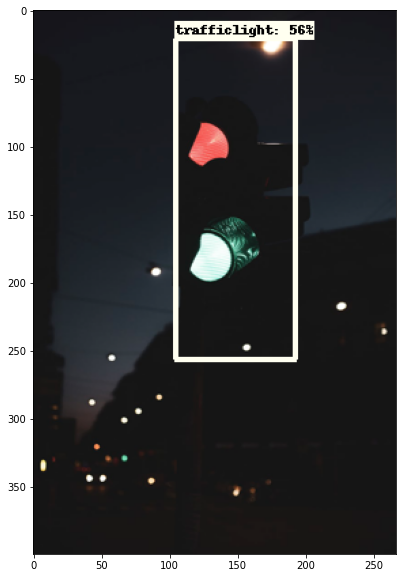

In [ ]:
IMAGE_PATH = os.path.join('/content/images/road0.png')

img = cv2.imread(IMAGE_PATH)
image_np = np.array(img)

input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
detections = detect_fn(input_tensor)

num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

label_id_offset = 1
image_np_with_detections = image_np.copy()

viz_utils.visualize_boxes_and_labels_on_image_array(
            image_np_with_detections,
            detections['detection_boxes'],
            detections['detection_classes']+label_id_offset,
            detections['detection_scores'],
            category_index,
            use_normalized_coordinates=True,
            max_boxes_to_draw=5,
            min_score_thresh=.5,
            agnostic_mode=False)

plt.figure(figsize = (10,10))
plt.imshow(cv2.cvtColor(image_np_with_detections, cv2.COLOR_BGR2RGB))
plt.show()

Detection Using Custom Detection Function

In [ ]:
colors = {'crosswalk': (255,0,0),
          'speedlimit': (0,234,255),
          'stop': (0,0,255),
          'trafficlight': (0,255,0)}

In [ ]:
def draw_label(image, label, x, y, box_color, font_color, font_face, font_scale):
    img = image.copy()

    text_size = cv2.getTextSize(label, fontFace=font_face, fontScale=font_scale, thickness=1)
    dim, baseline = text_size[0], text_size[1]
    
    # cv2.rectangle(img, (x,y), (x + dim[0], y + dim[1] + baseline), box_color, cv2.FILLED);
    # cv2.putText(img, label, (x, y + dim[1] + 2), fontFace=font_face, fontScale=font_scale, color=font_color, thickness=1)

    cv2.rectangle(img, (x, y - dim[1] - baseline), (x + dim[0], y), box_color, cv2.FILLED);
    cv2.putText(img, label, (x, y - dim[1] + 5), fontFace=font_face, fontScale=font_scale, color=font_color, thickness=1)

    return img

def detect_image(image, detection_threshold, category_index, colors):
    image_np = np.array(image)
    height = image_np.shape[0]
    width = image_np.shape[1]

    input_tensor = tf.convert_to_tensor(np.expand_dims(image_np, 0), dtype=tf.float32)
    detections = detect_fn(input_tensor)
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
              for key, value in detections.items()}

    bboxs = []
    scores = []
    classes = []
    
    for i in range(detections['detection_boxes'].shape[0]):
        if detections['detection_scores'][i] >= detection_threshold:
            bboxs.append(detections['detection_boxes'][i])
            scores.append(detections['detection_scores'][i])
            classes.append(detections['detection_classes'][i])

    for i in range(len(bboxs)):
        bbox = bboxs[i]
        ymin, xmin, ymax, xmax = int(bbox[0]*height), int(bbox[1]*width), int(bbox[2]*height), int(bbox[3]*width)
        score = int(scores[i]*100)
        clas = classes[i]
        label = f"{category_index[clas+1]['name']} : {score}%"
        color = colors[category_index[clas+1]['name']]

        cv2.rectangle(image_np, (xmin, ymin), (xmax, ymax), color = color, thickness = 2)
        image_np = draw_label(image_np, label, xmin, ymin, color, (0,0,0), cv2.FONT_HERSHEY_SIMPLEX, 0.4)

    return image_np


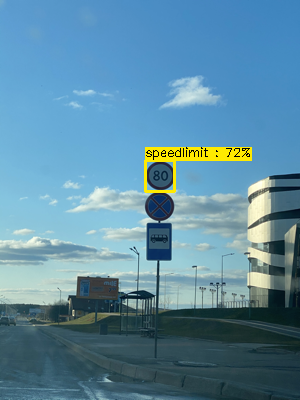

In [ ]:
from google.colab.patches import cv2_imshow

IMAGE_PATH = os.path.join('/content/images/road584.png')
image = cv2.imread(IMAGE_PATH)

detected_image = detect_image(image,
                              detection_threshold = 0.5,
                              category_index = category_index,
                              colors = colors)

cv2_imshow(detected_image)

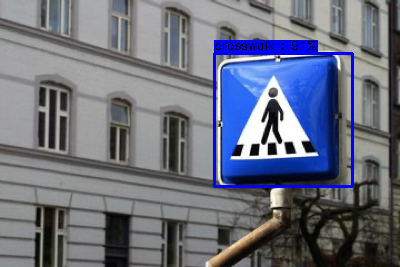

In [ ]:
from google.colab.patches import cv2_imshow

IMAGE_PATH = os.path.join('/content/images/road128.png')
image = cv2.imread(IMAGE_PATH)

detected_image = detect_image(image,
                              detection_threshold = 0.5,
                              category_index = category_index,
                              colors = colors)

cv2_imshow(detected_image)